In [0]:
!wget -O train_fish.npy https://www.dropbox.com/s/w9sresh4pmjz5fg/train_fishing.npy?dl=1
!wget -O train_fish_cv.npy https://www.dropbox.com/s/g5i2d143axl6m17/train_fishing_cv.npy?dl=1

--2019-10-24 07:44:23--  https://www.dropbox.com/s/w9sresh4pmjz5fg/train_fishing.npy?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/w9sresh4pmjz5fg/train_fishing.npy [following]
--2019-10-24 07:44:28--  https://www.dropbox.com/s/dl/w9sresh4pmjz5fg/train_fishing.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucff401bbb1845862f0552bd3b78.dl.dropboxusercontent.com/cd/0/get/ArD7TRmf8W2zkM8QOVIMyygdckdsTe0fkh6z7h3d_rd5-VpvyCoOBibnie86HuSrtSua0Ob2rZaN_9ihpuT5eW20q7gAaHCpfF91_1yHf_ydUgzE0KtoB7d0yypVob2VFWc/file?dl=1# [following]
--2019-10-24 07:44:28--  https://ucff401bbb1845862f0552bd3b78.dl.dropboxusercontent.com/cd/0/get/ArD7TRmf8W2zkM8QOVIMyygdckdsTe0fkh6z7h3d_rd5-VpvyCoOBibnie86HuSrtSua0Ob2rZaN_9ihpuT5eW20q7gAaHCpf

In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
!pip install tensorflow-gpu==1.10.0
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=9.0.176-1

     |████████████████████████████████| 253.3MB 56kB/s 
     |████████████████████████████████| 573kB 51.1MB/s 
     |████████████████████████████████| 3.3MB 37.4MB/s 
     |████████████████████████████████| 12.2MB 29.3MB/s 
ERROR: tensorflow 1.15.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.10.0 which is incompatible.
ERROR: spacy 2.1.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: fastai 1.0.58 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: cvxpy 1.0.25 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: blis 0.2.4

In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import numpy as np


train_fishing_path = './train_fish.npy'
train_fishing_cv_path = './train_fish_cv.npy'

train_data = np.load(train_fishing_path)
print(train_data.shape)
train_cv_data = np.load(train_fishing_cv_path)
print(train_cv_data.shape)

x_train = train_data[:, :-1].reshape(len(train_data), 10, 100, 100, 3)
y_train = train_data[:, -1]
print(x_train.shape)
print(y_train.shape)
print(y_train[3:10])

x_cv_train = train_cv_data[:, :-1].reshape(len(train_cv_data), 10, 100, 100, 3)
y_cv_train = train_cv_data[:, -1]
print(x_cv_train.shape)
print(y_cv_train.shape)

model = tf.keras.models.Sequential([
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(10, 100, 100, 3))
    ),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))
    ),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu')
    ),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))
    ),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu')
    ),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))
    ),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu')
    ),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))
    ),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.Flatten()
    ),
    # tf.keras.layers.TimeDistributed(
    #     tf.keras.layers.Dropout(0.5)
    # ),
    # tf.keras.layers.TimeDistributed(
    #     tf.keras.layers.Dense(128,activation='relu')
    # ),
    tf.keras.layers.LSTM(1, return_sequences=False, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['acc'])

model.build(input_shape=(None, 10, 100, 100, 3))
model.summary()

history = model.fit(x=x_train, y=y_train, epochs=300, verbose=2, validation_data=(x_cv_train, y_cv_train))

print((model.predict(x_train) > 0.5).flatten() + 0.)
print(y_train)
print((model.predict(x_cv_train) > 0.5).flatten() + 0.)
print(y_cv_train)

(96, 300001)
(19, 300001)
(96, 10, 100, 100, 3)
(96,)
[0. 1. 0. 0. 0. 1. 0.]
(19, 10, 100, 100, 3)
(19,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_19 (TimeDis (None, 10, 98, 98, 8)     224       
_________________________________________________________________
time_distributed_20 (TimeDis (None, 10, 49, 49, 8)     0         
_________________________________________________________________
time_distributed_21 (TimeDis (None, 10, 47, 47, 8)     584       
_________________________________________________________________
time_distributed_22 (TimeDis (None, 10, 23, 23, 8)     0         
_________________________________________________________________
time_distributed_23 (TimeDis (None, 10, 21, 21, 16)    1168      
_________________________________________________________________
time_distributed_24 (TimeDis (None, 10, 10, 10, 16)    0         
_____________________________________

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import numpy as np


train_fishing_path = './train_fish.npy'
train_fishing_cv_path = './train_fish_cv.npy'

train_data = np.load(train_fishing_path)
print(train_data.shape)
train_cv_data = np.load(train_fishing_cv_path)
print(train_cv_data.shape)

x_train = train_data[:, :-1].reshape(len(train_data), 10, 100, 100, 3)
y_train = train_data[:, -1]
print(x_train.shape)
print(y_train.shape)
print(y_train[3:10])

x_cv_train = train_cv_data[:, :-1].reshape(len(train_cv_data), 10, 100, 100, 3)
y_cv_train = train_cv_data[:, -1]
print(x_cv_train.shape)
print(y_cv_train.shape)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv3D(16, (3, 3, 3), activation='relu', input_shape=(10, 100, 100, 3)),
    tf.keras.layers.MaxPool3D((1, 2, 2)),
    tf.keras.layers.Conv3D(32, (3, 3, 3), activation='relu'),
    tf.keras.layers.MaxPool3D((1, 2, 2)),
    tf.keras.layers.Conv3D(64, (1, 3, 3), activation='relu'),
    tf.keras.layers.MaxPool3D((1, 2, 2)),
    tf.keras.layers.Conv3D(128, (1, 3, 3), activation='relu'),
    tf.keras.layers.MaxPool3D((1, 2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['acc'])

# model.build(input_shape=(None, 5, 100, 100, 3))
model.summary()

history = model.fit(x=x_train, y=y_train, epochs=300, verbose=2, validation_data=(x_cv_train, y_cv_train))

print((model.predict(x_train) > 0.5).flatten() + 0.)
print(y_train)
print((model.predict(x_cv_train) > 0.5).flatten() + 0.)
print(y_cv_train)

(96, 300001)
(19, 300001)
(96, 10, 100, 100, 3)
(96,)
[0. 1. 0. 0. 0. 1. 0.]
(19, 10, 100, 100, 3)
(19,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 8, 98, 98, 16)     1312      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 8, 49, 49, 16)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 6, 47, 47, 32)     13856     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 6, 23, 23, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 6, 21, 21, 64)     18496     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 6, 10, 10, 64)     0         
_____________________________________

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(x_input):
  num, frames = x_input.shape[0], x_input.shape[1]
  fig, ax = plt.subplots(num, frames, figsize=(15, 20))

  for i, a in enumerate(ax.ravel()):
    a.imshow(x_input[int(i / frames), i % frames])
  plt.show()


(20, 150001)
(4, 150001)
(20, 5, 100, 100, 3)
(20,)
(4, 5, 100, 100, 3)
(4,)
[1. 0. 0. 1. 1. 1. 0. 1. 0. 0.]


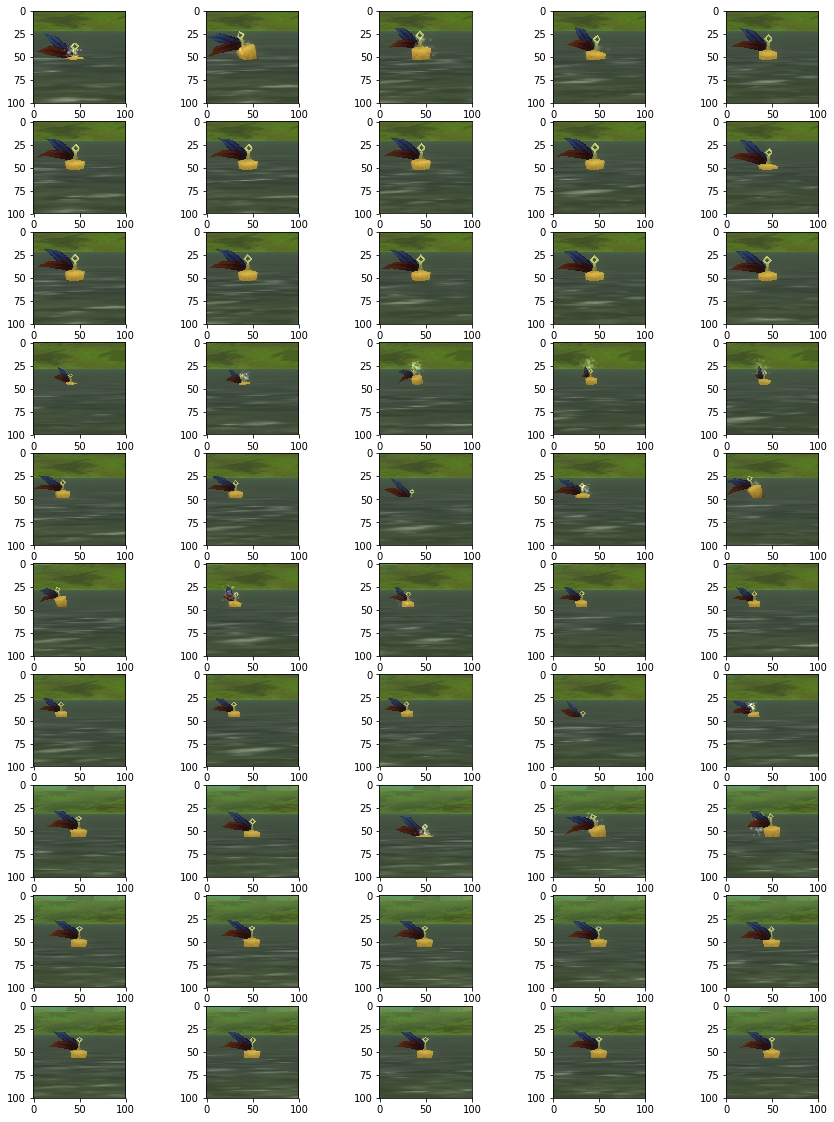

In [0]:
import matplotlib.pyplot as plt
import numpy as np


train_fishing_path = './train_fish.npy'
train_fishing_cv_path = './train_fish_cv.npy'

train_data = np.load(train_fishing_path)
print(train_data.shape)
train_cv_data = np.load(train_fishing_cv_path)
print(train_cv_data.shape)

x_train = train_data[:, :-1].reshape(len(train_data), 5, 100, 100, 3)
y_train = train_data[:, -1]
print(x_train.shape)
print(y_train.shape)

x_cv_train = train_cv_data[:, :-1].reshape(len(train_cv_data), 5, 100, 100, 3)
y_cv_train = train_cv_data[:, -1]
print(x_cv_train.shape)
print(y_cv_train.shape)

def plot_images(x_input):
  num, frames = x_input.shape[0], x_input.shape[1]
  fig, ax = plt.subplots(num, frames, figsize=(15, 20))

  for i, a in enumerate(ax.ravel()):
    a.imshow(x_input[int(i / frames), i % frames])
  plt.show()

print(y_train[:10])
plot_images(x_train[:10])